In [147]:
import pandas as pd
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('punkt')
# nltk.download('punkt_tab')
# nltk.download('averaged_perceptron_tagger_eng')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import re
import matplotlib.pyplot as plt

In [136]:
# using 1000 of each positive and negative reviews
df = pd.read_csv(r"IMDB Dataset.csv")
df_positive= df[df['sentiment'] == 'positive'].head(1000)
df_negative= df[df['sentiment'] == 'negative'].head(1000)
df = pd.concat([df_positive, df_negative])
# print(df.info())

In [137]:
regex = re.compile('[^a-zA-Z ]')
stopwords = stopwords.words('english')
# print(stopwords)
stopwords_no_punct = [regex.sub('', word) for word in stopwords]
stopwords_no_punct.append("br")

stopwords_new = set(stopwords + stopwords_no_punct)
# print(stopwords_new)

In [138]:
df['review_cleaned'] = df['review'].astype("string").apply(lambda x: regex.sub('', x))

df['review_cleaned'] = df['review_cleaned'].apply(lambda x: word_tokenize(x.lower()))
df['review_cleaned'] = df['review_cleaned'].apply(lambda x: [word for word in x if word not in stopwords_new])

print(df.head(10))

                                               review sentiment  \
0   One of the other reviewers has mentioned that ...  positive   
1   A wonderful little production. <br /><br />The...  positive   
2   I thought this was a wonderful way to spend ti...  positive   
4   Petter Mattei's "Love in the Time of Money" is...  positive   
5   Probably my all-time favorite movie, a story o...  positive   
6   I sure would like to see a resurrection of a u...  positive   
9   If you like original gut wrenching laughter yo...  positive   
14  This a fantastic movie of three prisoners who ...  positive   
16  Some films just simply should not be remade. T...  positive   
18  I remember this film,it was the first film i h...  positive   

                                       review_cleaned  
0   [one, reviewers, mentioned, watching, oz, epis...  
1   [wonderful, little, production, filming, techn...  
2   [thought, wonderful, way, spend, time, hot, su...  
4   [petter, matteis, love, time, mone

In [139]:
# POS taging

df['tagged'] = df['review_cleaned'].apply(lambda x: nltk.pos_tag(x))

In [ ]:
# df_sus = df[df['tagged'].apply(lambda row: any(tag == "''" for (_, tag) in row))]
# print(df_sus)

In [141]:
# print(df['tagged'][2007])

In [142]:
# POS count
pos_count_by_type = {}

for group_value, group_df in df.groupby("sentiment"):
    tags = [tag for row in group_df["tagged"] for (_, tag) in row]
    pos_count_by_type[group_value] = Counter(tags)

print(pos_count_by_type)

{'negative': Counter({'NN': 37120, 'JJ': 22113, 'NNS': 11441, 'RB': 9673, 'VBP': 5710, 'VBG': 5147, 'VBD': 4613, 'VBN': 2963, 'VBZ': 2811, 'VB': 2750, 'IN': 2461, 'CD': 1431, 'MD': 1246, 'JJS': 578, 'JJR': 410, 'DT': 359, 'RBR': 358, 'PRP': 161, 'FW': 136, 'CC': 128, 'RP': 89, 'NNP': 69, 'WDT': 51, 'WP$': 29, 'RBS': 23, 'WRB': 22, 'TO': 16, 'UH': 15, 'WP': 14, 'PRP$': 2, 'EX': 1, 'SYM': 1, 'NNPS': 1, "''": 1}), 'positive': Counter({'NN': 39512, 'JJ': 23829, 'NNS': 12406, 'RB': 9390, 'VBP': 6065, 'VBG': 4951, 'VBD': 4471, 'VBZ': 3359, 'VBN': 2898, 'VB': 2719, 'IN': 2433, 'CD': 1526, 'MD': 1086, 'JJS': 606, 'JJR': 387, 'DT': 350, 'RBR': 273, 'PRP': 187, 'FW': 140, 'RP': 114, 'CC': 95, 'NNP': 75, 'RBS': 52, 'WP$': 41, 'WDT': 18, 'WRB': 18, 'UH': 13, 'WP': 10, 'PRP$': 4, 'TO': 3})}


In [166]:
# POS dataframe
pos_df = pd.DataFrame(pos_count_by_type).reset_index()
pos_df.rename(columns={'index':'pos'}, inplace=True)

# top 10 positive POS
pos_positive = pos_df[['pos', 'positive']].sort_values(by='positive', ascending=False).head(10)
pos_positive = pos_positive.sort_values(by='positive') # just for plotting

# top 10 negative POS
pos_negative = pos_df[['pos', 'negative']].sort_values(by='negative', ascending=False).head(10)
pos_negative = pos_negative.sort_values(by='negative') # just for plotting

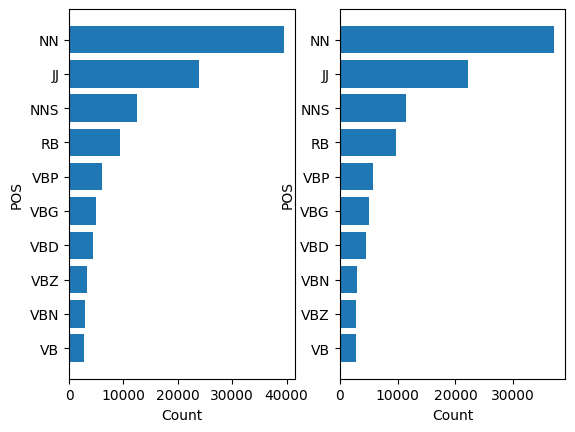

In [170]:
# POS visualization

fig, ax = plt.subplots(1,2)
ax[0].barh(pos_positive['pos'], pos_positive['positive'])
ax[0].set_xlabel('Count')
ax[0].set_ylabel('POS')

ax[1].barh(pos_negative['pos'], pos_negative['negative'])
ax[1].set_xlabel('Count')
ax[1].set_ylabel('POS')

plt.show()